# Convolutional Neural Network

## Import statements

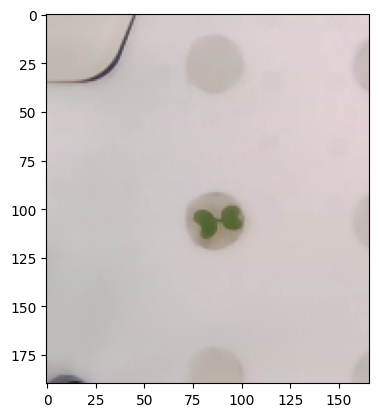

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils import print_np_array_properties

import cv2
import numpy as np

%matplotlib inline


image = mpimg.imread('./data/rgbd_plant/rgb_00_000_00.png')

plt.imshow(image)

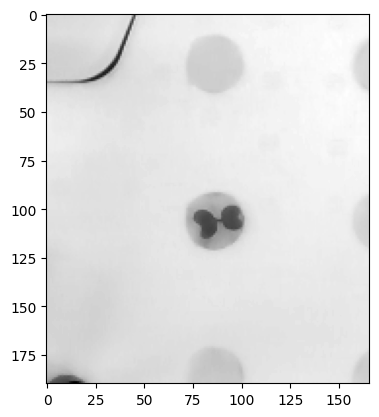

In [2]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap = 'gray')

## Covolution Kernal

=============== np array Properties =============

np array:
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
np array_dtype: int64
np array_shape: (4, 4)
np array_size: 16

=============== np array Properties =============

np array:
 [[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]
np array_dtype: int64
np array_shape: (4, 4, 4)
np array_size: 64

=============== np array Properties =============

np array:
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
np array_dtype: int64
np array_shape: (4, 4)
np array_size: 16

=============== np array Properties =============

np array:
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]
np array_dtype: int64
np array_shape: (4, 4)
np array_size: 16

=============== np array Properties ==========

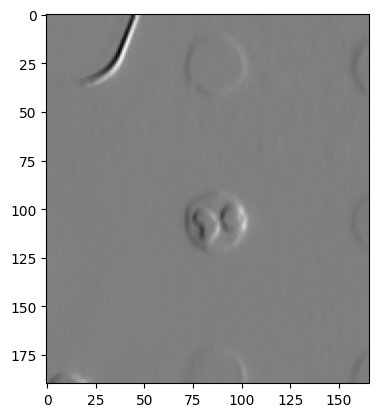

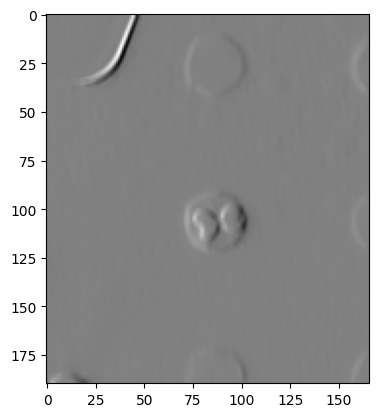

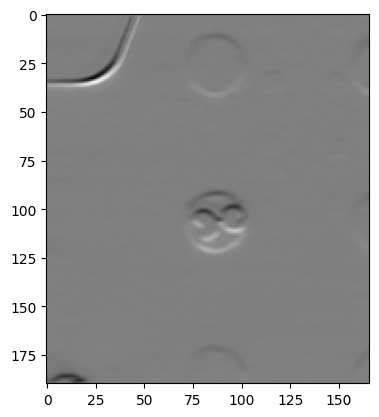

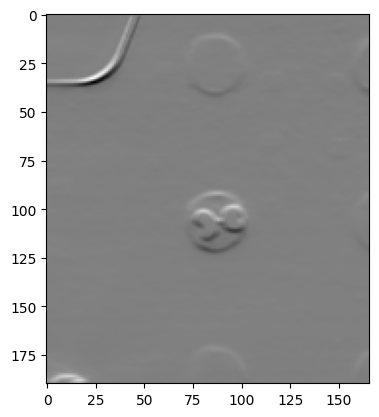

In [3]:
filter_vals = np.array([[-1,-1,1,1],
                        [-1,-1,1,1],
                        [-1,-1,1,1],
                        [-1,-1,1,1]
                       ])

print_np_array_properties(filter_vals)


filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

filters = np.array([filter_1,filter_2,filter_3,filter_4])
print_np_array_properties(filters)


for filter in filters:
    
    print_np_array_properties(filter)
    x = cv2.filter2D(gray, -1, filter)
    plt.figure()
    plt.imshow(x, cmap='gray')

## Convolutional Layer and Max pooling Layer

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        
        k_height, k_width = weight.shape[2:]
        
        self.conv = nn.Conv2d(1,4, kernel_size=(k_height, k_width), bias = False)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv.weight = torch.nn.Parameter(weight)
        
        
    def forward(self,x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        
        return conv_x, activated_x, pooled_x
    
print_np_array_properties(filters)

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

print(weight.shape[2:])

print_np_array_properties(weight)

model = Net(weight)

print(model)
        

=============== np array Properties =============

np array:
 [[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]
np array_dtype: int64
np array_shape: (4, 4, 4)
np array_size: 64

torch.Size([4, 4])
=============== np array Properties =============

np array:
 tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])

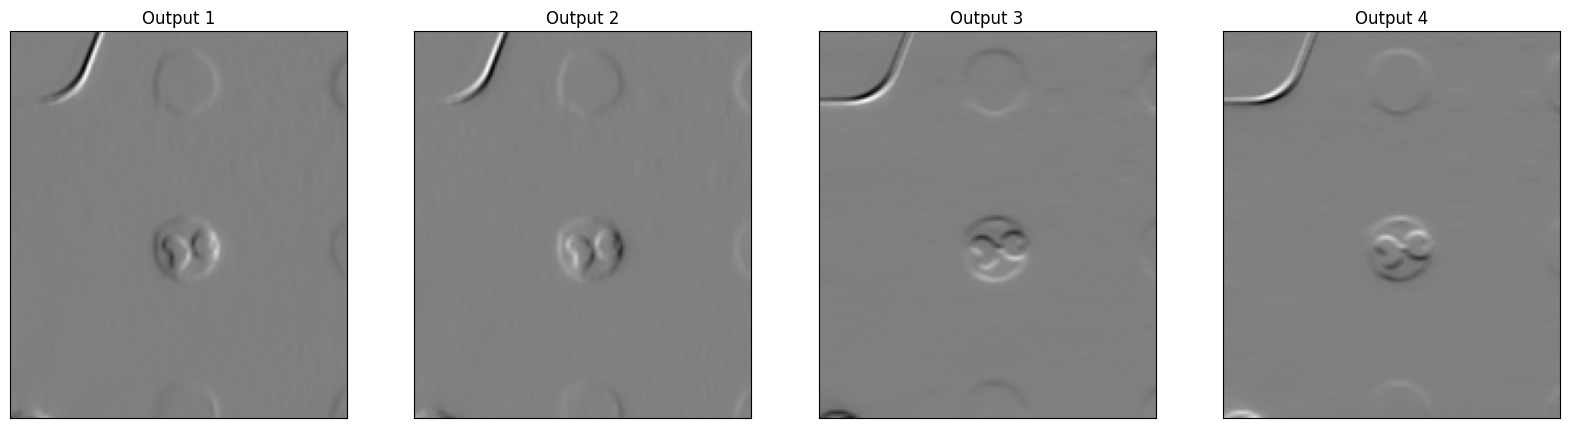

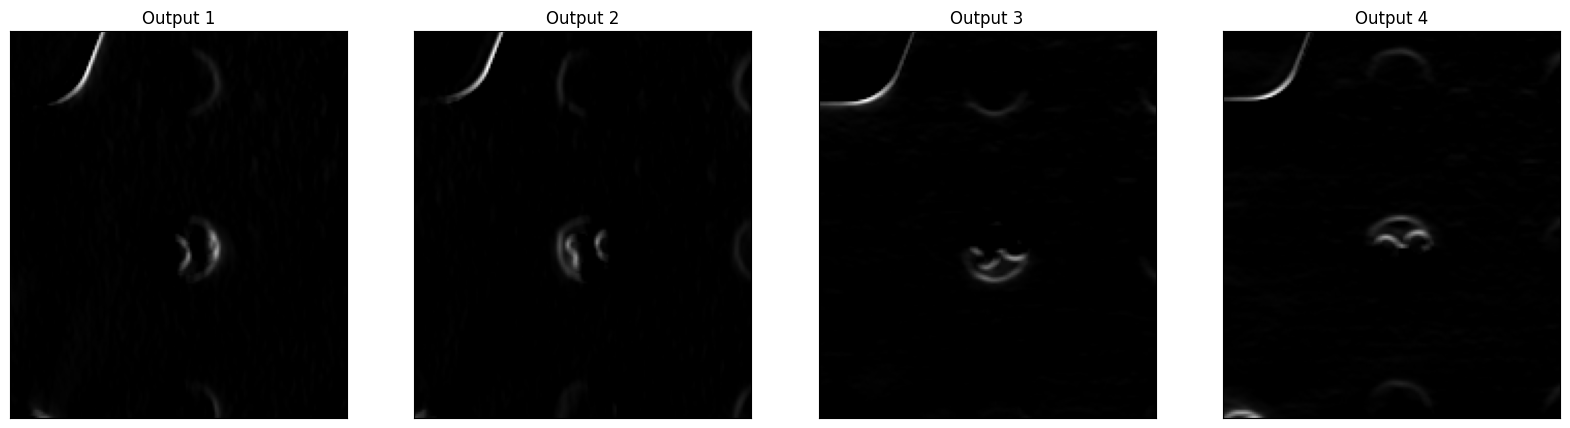

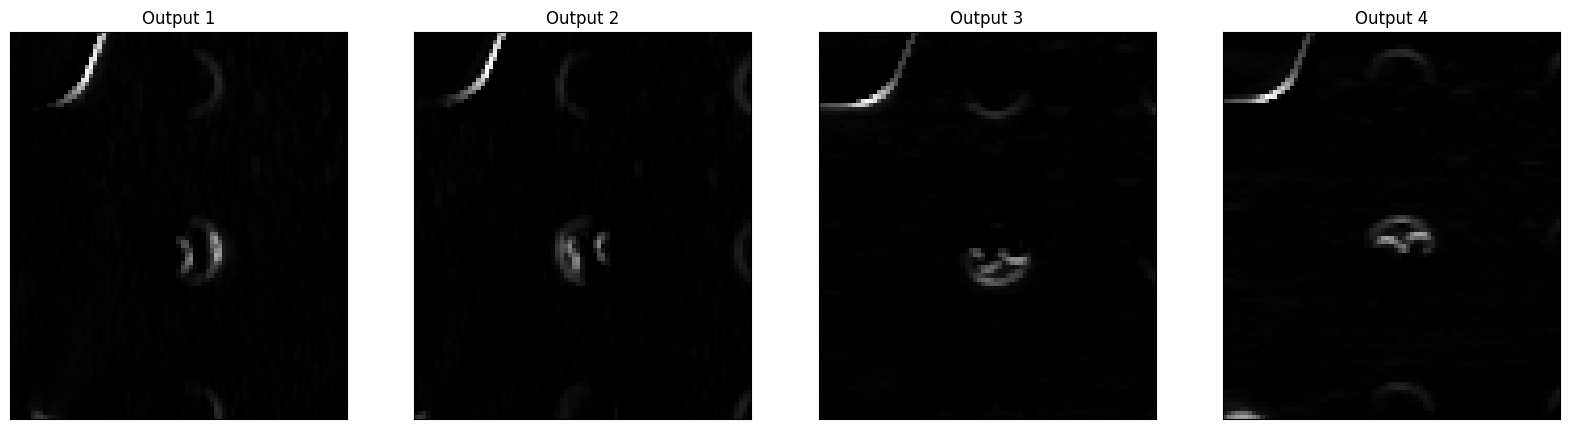

In [5]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))



gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

viz_layer(conv_layer)
viz_layer(activated_layer)
viz_layer(pooled_layer)